## Data Analysis and Pre-processing

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataframe
crop_df = pd.read_csv('Crop_recommendation.csv')

In [3]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop_df.shape

(2200, 8)

In [6]:
crop_df.size

17600

In [7]:
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# checking for null values
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# checking for null values
crop_df.isnull().values.any()

False

In [10]:
crop_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
crop_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
crop_df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [14]:
crop_df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

<AxesSubplot:>

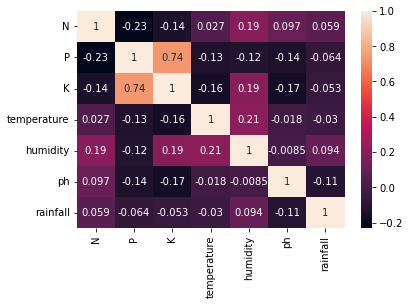

In [15]:
sns.heatmap(crop_df.corr(),annot=True)

## Separating Features and Target Label

In [16]:
crop_feature = crop_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
crop_target = crop_df['label']

In [17]:
# splitting dataframe into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(crop_feature,crop_target,test_size = 0.25, random_state = 11)

# accuracy
acc = []
# model name
model = []

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion = "entropy",random_state = 11,max_depth = 5)

DecisionTree.fit(x_train,y_train)

pred = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, pred)
acc.append(x)                         
model.append('Decision Tree')         
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(y_test,pred))

DecisionTrees's Accuracy is:  0.9272727272727272
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.94      1.00      0.97        29
   blackgram       0.69      1.00      0.81        24
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      0.95      0.98        21
      coffee       1.00      0.80      0.89        30
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        27
        jute       0.56      1.00      0.71        15
 kidneybeans       1.00      0.83      0.91        24
      lentil       0.88      0.95      0.91        22
       maize       0.70      0.89      0.78        18
       mango       0.97      0.94      0.95        31
   mothbeans       0.94      0.58      0.71        26
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        27
      orange       0.97      1.0

In [19]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
val_score = cross_val_score(DecisionTree, crop_feature, crop_target, cv=5)
val_score

array([0.93636364, 0.90909091, 0.91818182, 0.87272727, 0.93636364])

In [20]:
# saving the model
import pickle 

DT_model = open('./DecisionTree.pkl', 'wb')
pickle.dump(DecisionTree, DT_model)
DT_model.close()

## Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(random_state=11)



LogisticRegression.fit(x_train,y_train)

pred = LogisticRegression.predict(x_test)

x = metrics.accuracy_score(y_test, pred)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,pred))

Logistic Regression's Accuracy is:  0.9472727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        29
   blackgram       0.92      0.92      0.92        24
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        30
      cotton       0.90      0.83      0.86        23
      grapes       1.00      1.00      1.00        27
        jute       0.58      0.93      0.72        15
 kidneybeans       0.96      1.00      0.98        24
      lentil       0.85      1.00      0.92        22
       maize       0.80      0.89      0.84        18
       mango       0.97      1.00      0.98        31
   mothbeans       0.95      0.77      0.85        26
    mungbean       0.93      0.96      0.95        28
   muskmelon       1.00      1.00      1.00        27
      orange       1.00   

In [22]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
val_score = cross_val_score(LogisticRegression, crop_feature, crop_target, cv=5)
val_score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [23]:
# saving the model
import pickle 

LR_model = open('./LogisticRegression.pkl', 'wb')
pickle.dump(LogisticRegression, LR_model)
LR_model.close()

##  Random Forest Classifier

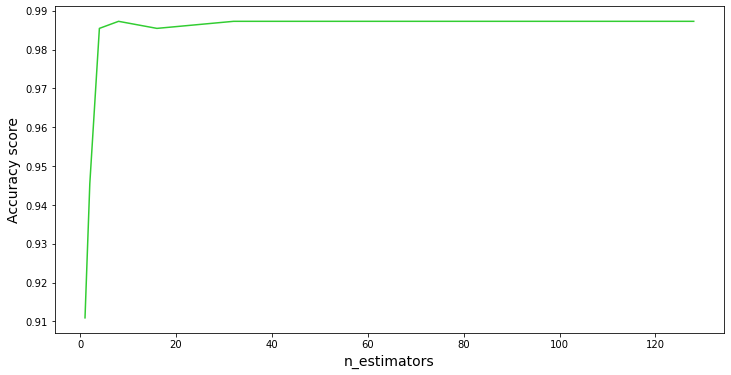

[0.9109090909090909,
 0.9454545454545454,
 0.9854545454545455,
 0.9872727272727273,
 0.9854545454545455,
 0.9872727272727273,
 0.9872727272727273,
 0.9872727272727273]

In [24]:
from sklearn.ensemble import RandomForestClassifier

accuracy = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 128]
for i in n_estimators:
    RandomForest = RandomForestClassifier(n_estimators=i, random_state=11)
    RandomForest.fit(x_train,y_train)
    predicted_values = RandomForest.predict(x_test)

    x = metrics.accuracy_score(y_test, predicted_values)
    accuracy.append(x) 

plt.figure(figsize=(12,6))
plt.plot(n_estimators, accuracy, 'b', label='Accuracy', color = 'limegreen')
plt.ylabel('Accuracy score', size = 14)
plt.xlabel('n_estimators', size = 14)

plt.show()

accuracy

In [25]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=8, random_state=11)
RandomForest.fit(x_train,y_train)

pred = RandomForest.predict(x_test)

x = metrics.accuracy_score(y_test, pred)
acc.append(x)
model.append('Random Forest Classifier')
print("Random Forest Classifier's Accuracy is: ", x)

print(classification_report(y_test,pred))

Random Forest Classifier's Accuracy is:  0.9872727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        29
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        27
        jute       0.68      1.00      0.81        15
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        31
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        27
      orange       1.

In [26]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
val_score = cross_val_score(RandomForest, crop_feature, crop_target, cv=5)
val_score

array([0.99318182, 0.99545455, 0.99090909, 0.99318182, 0.99318182])

In [27]:
# saving the model
import pickle 

RFC_model = open('./RandomForestClassifier.pkl', 'wb')
pickle.dump(RandomForest, RFC_model)
RFC_model.close()

## Support Vector Machine 

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# normalizing data using sklearn
# fitting scaler on training data
norm_data = MinMaxScaler().fit(x_train)
x_train_norm = norm_data.transform(x_train)

# transforming testing data
x_test_norm = norm_data.transform(x_test)

SupportVectorMachine = SVC(kernel='poly', degree=3, C=1)
SupportVectorMachine.fit(x_train_norm,y_train)
pred = SupportVectorMachine.predict(x_test_norm)
x = metrics.accuracy_score(y_test, pred)
acc.append(x)
model.append('Support Vector Machine')
print("Support Vector Machine's Accuracy is: ", x)

print(classification_report(y_test,pred))

Support Vector Machine's Accuracy is:  0.9745454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        29
   blackgram       1.00      0.96      0.98        24
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.97      0.98        30
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        27
        jute       0.60      1.00      0.75        15
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.88      1.00      0.94        22
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        31
   mothbeans       1.00      0.92      0.96        26
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        27
      orange       1.00

In [29]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
val_score = cross_val_score(SupportVectorMachine, crop_feature, crop_target, cv=5)
val_score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [30]:
# saving the model
import pickle 

SVM_model = open('./SupportVectorMachine.pkl', 'wb')
pickle.dump(SupportVectorMachine, SVM_model)
SVM_model.close()

##  Guassian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

GuassianNaiveBayes = GaussianNB()

GuassianNaiveBayes.fit(x_train,y_train)

pred = GuassianNaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, pred)
acc.append(x)
model.append('Guassian Naive Bayes')
print("Guassian Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,pred))

Guassian Naive Bayes's Accuracy is:  0.9854545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        29
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        27
        jute       0.65      1.00      0.79        15
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        31
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        27
      orange       1.00  

In [32]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
val_score = cross_val_score(GuassianNaiveBayes, crop_feature, crop_target, cv=5)
val_score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [33]:
# saving the model
import pickle 

NB_model = open('./GuassianNaiveBayes.pkl', 'wb')
pickle.dump(GuassianNaiveBayes, NB_model)
NB_model.close()

## K-Nearest Neighbour 

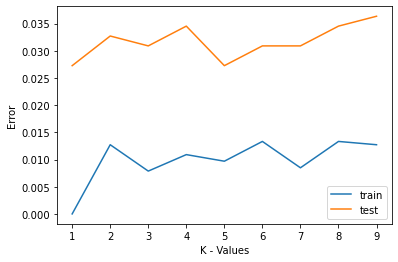

In [34]:
from sklearn.neighbors import KNeighborsClassifier 

# determining k by checking error 
err_1=[]
err_2=[]

for k in range(1,10):
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train,y_train)
  y_pred_1 = KNN.predict(x_train)
  err_1.append(np.mean(y_train!=y_pred_1))
  y_pred_2 = KNN.predict(x_test)
  err_2.append(np.mean(y_test!=y_pred_2))
    
plt.plot(range(1,10),err_1,label='train')
plt.plot(range(1,10),err_2,label='test')
plt.xlabel('K - Values')
plt.ylabel('Error')
plt.legend()

In [35]:
from sklearn.preprocessing import MinMaxScaler

# normalizing data using sklearn
norm_data = MinMaxScaler().fit(x_train)
x_train_norm = norm_data.transform(x_train)
x_test_norm = norm_data.transform(x_test)

# at k = 5 error difference is minimum
KNearestNeighbour = KNeighborsClassifier(n_neighbors=5)
KNearestNeighbour.fit(x_train_norm,y_train)
pred = KNearestNeighbour.predict(x_test_norm)

x = metrics.accuracy_score(y_test, pred)
acc.append(x)                         
model.append('KNN')                   
print("KNN's Accuracy is: ", x)

print(classification_report(y_test,pred))

KNN's Accuracy is:  0.9745454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        29
   blackgram       1.00      0.96      0.98        24
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        27
        jute       0.61      0.93      0.74        15
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.88      1.00      0.94        22
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        31
   mothbeans       0.96      0.92      0.94        26
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.0

In [36]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
val_score = cross_val_score(KNearestNeighbour, crop_feature, crop_target, cv=5)
val_score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

In [37]:
# saving the model
import pickle 

KNN_model = open('./KNearestNeighbour.pkl', 'wb')
pickle.dump(KNearestNeighbour, KNN_model)
KNN_model.close()

# Comparing Models Accuracy

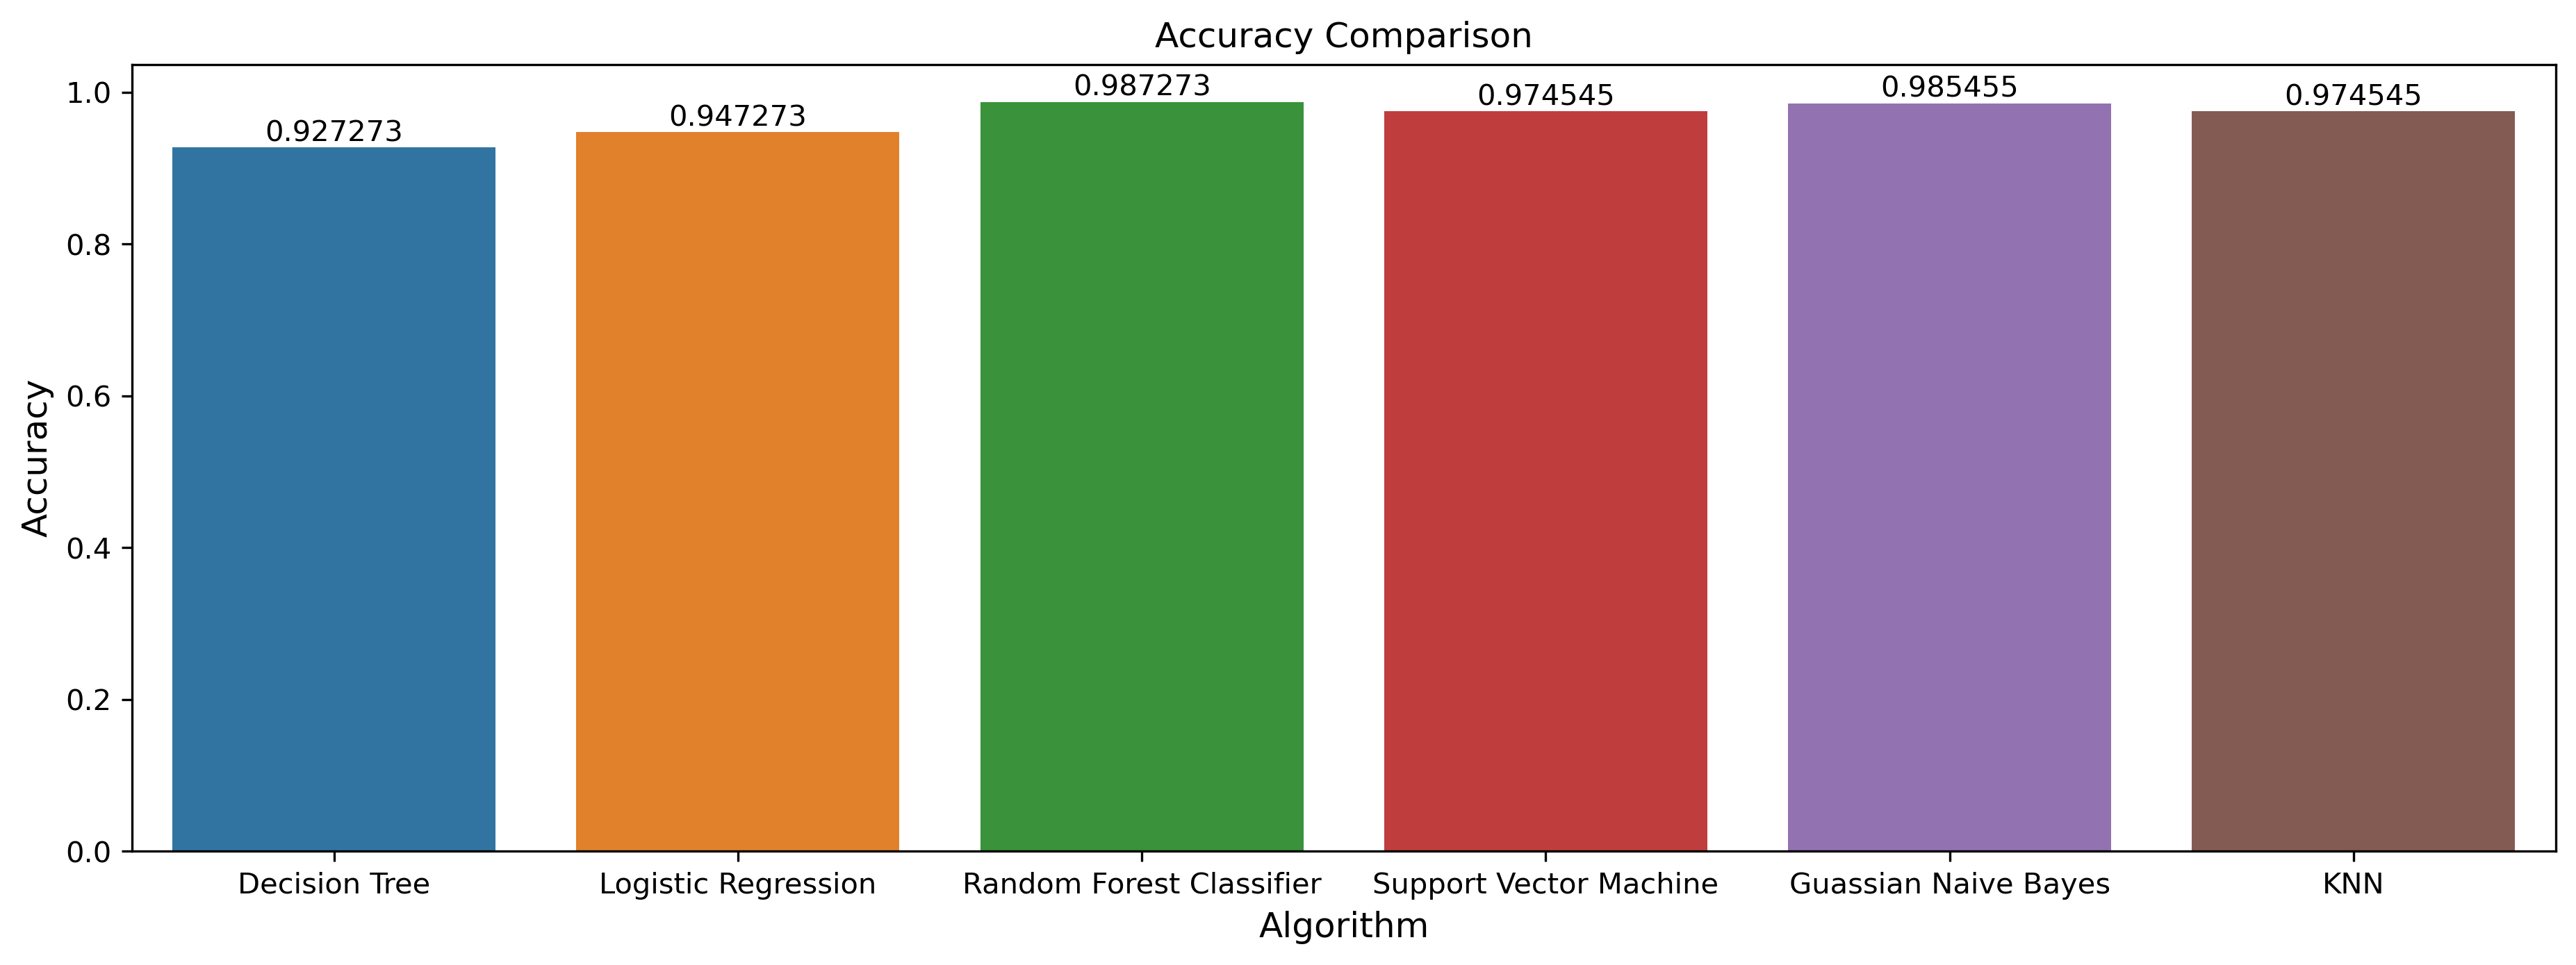

In [38]:
plt.figure(figsize=[15,5], dpi = 300)
plt.title('Accuracy Comparison', size = 12)
plt.xlabel('Algorithm', size = 12)
plt.ylabel('Accuracy', size = 12)
ax = sns.barplot(x = model, y = acc)
ax.bar_label(ax.containers[0])
plt.show()


In [39]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9272727272727272
Logistic Regression --> 0.9472727272727273
Random Forest Classifier --> 0.9872727272727273
Support Vector Machine --> 0.9745454545454545
Guassian Naive Bayes --> 0.9854545454545455
KNN --> 0.9745454545454545


## Predicting Results 

In [40]:
data = np.array([[73, 65, 80, 89, 60.3, 8, 140.91]])
prediction = RandomForest.predict(data)
print(prediction)

['chickpea']


In [41]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RandomForest.predict(data)
print(prediction)

['jute']


## User Interface (GUI) 

In [42]:
# importing libraries

from tkinter import *
import tkinter as tk
from PIL import Image, ImageTk
from tkinter import messagebox
import csv
from csv import *
import os

In [44]:
# making user interface using GUI

# adding background image
def on_resize(event):
    # resize the background image to the size of label
    image = bg_img.resize((event.width, event.height), Image.ANTIALIAS)
    # update the image of the label
    bg_label.image = ImageTk.PhotoImage(image)
    bg_label.config(image=bg_label.image)


crop_window = tk.Tk()
crop_window.geometry("1280x1024")  # setting resolution


    
bg_img = Image.open('./images/bg.jpg') # load the background image
bg_label = tk.Label(crop_window)
bg_label.place(x=0, y=0, relwidth=1, relheight=1) # make bg_label to fit crop_window 
bg_label.bind('<Configure>', on_resize) # call on_resize whenever bg_label is resized




N_level=tk.StringVar()
P_level=tk.StringVar()
K_level=tk.StringVar()
avg_temp=tk.StringVar()
avg_humid=tk.StringVar()
PH_value=tk.StringVar()
avg_rainfall=tk.StringVar()
location=tk.StringVar()


# creating window title
crop_window.title('CS4020-Data Science Project')

# check input is valid or not
def validate_input(val):
    try:
        float(val) # only floats value are allowed
    except:
        return False
    return True

validation = crop_window.register(validate_input)


# creating title for the window
title0=tk.Label(crop_window,text='Crop Prediction and Analysis using Machine Learning',font='Helvetica 28 bold', justify='center', 
                bg = "#f9fce8", anchor="w")
title0.grid(sticky = W, row=0,columnspan=3,padx=10,pady=10)

title1=tk.Label(crop_window,text='Data Science Project',font='Helvetica 16 bold', justify='center', bg = "#f9fce8", anchor="w")
title1.grid(sticky = W, row=1,columnspan=3,padx=350,pady=10)

# creating rows with input field in the window

row1=tk.Label(crop_window,text='Enter ratio of Nitrogen',font=22, justify=LEFT, width = 50, bg = "#f9fce8", anchor="w")
row1.grid(sticky = W, row=3,column=0,padx=10,pady=10)
input1=tk.Entry(crop_window,validate="key", validatecommand=(validation, '%P'), font=22,width=8,textvariable=N_level)
input1.grid(row=3,column=2,padx=10,pady=10)

row2=tk.Label(crop_window,text='Enter ratio of Phosphorous',font=22, justify=LEFT, width = 50, bg = "#f9fce8", anchor="w")
row2.grid(sticky = W, row=4,column=0,padx=10,pady=10)
input2=tk.Entry(crop_window,validate="key", validatecommand=(validation, '%P'),font=22,width=8,textvariable=P_level)
input2.grid(row=4,column=2,padx=10,pady=10)

row3=tk.Label(crop_window,text='Enter ratio of Potassium',font=22, justify=LEFT, width = 50, bg = "#f9fce8", anchor="w")
row3.grid(sticky = W, row=5,column=0,padx=10,pady=10)
input3=tk.Entry(crop_window,validate="key", validatecommand=(validation, '%P'),font=22,width=8,textvariable=K_level)
input3.grid(row=5,column=2,padx=10,pady=10)

row4=tk.Label(crop_window,text='Enter average Temperature (C)',font=22, justify=LEFT, width = 50, bg = "#f9fce8", anchor="w")
row4.grid(sticky = W, row=6,column=0,padx=10,pady=10)
input4=tk.Entry(crop_window,validate="key", validatecommand=(validation, '%P'),font=22,width=8,textvariable=avg_temp)
input4.grid(row=6,column=2,padx=10,pady=10)

row5=tk.Label(crop_window,text='Enter average percentage of Humidity (%)',font=22, justify=LEFT, width = 50, bg = "#f9fce8", anchor="w")
row5.grid(sticky = W, row=7,column=0,padx=10,pady=10)
input5=tk.Entry(crop_window,validate="key", validatecommand=(validation, '%P'),font=22,width=8,textvariable=avg_humid)
input5.grid(row=7,column=2,padx=10,pady=10)

row6=tk.Label(crop_window,text='Enter PH value',font=22, justify=LEFT, width = 50, bg = "#f9fce8", anchor="w")
row6.grid(sticky = W, row=8,column=0,padx=10,pady=10)
input6=tk.Entry(crop_window,validate="key", validatecommand=(validation, '%P'),font=22,width=8,textvariable=PH_value)
input6.grid(row=8,column=2,padx=10,pady=10)

row7=tk.Label(crop_window,text='Enter average amount of Rainfall (mm)',font=22, justify=LEFT, width = 50, bg = "#f9fce8", anchor="w")
row7.grid(sticky = W, row=9,column=0,padx=10,pady=10)
input7=tk.Entry(crop_window,validate="key", validatecommand=(validation, '%P'),font=22,width=8,textvariable=avg_rainfall)
input7.grid(row=9,column=2,padx=10,pady=10)

row8=tk.Label(crop_window,text='Enter your location (optional)',font=22, justify=LEFT, width = 50, bg = "#f9fce8", anchor="w")
row8.grid(sticky = W, row=10,column=0,padx=10,pady=10)
input8=tk.Entry(crop_window, font=22,width=8,textvariable=str(location))
input8.grid(row=10,column=2,padx=10,pady=10)




# save input to csv file function   
save_data=[]
def add_to_csv():
    path = os.path.isfile('./crop_data.csv')
    # if file already exists
    if path == True:
        df = pd.read_csv('crop_data.csv')
        data = pd.Series([N_level.get(), P_level.get(), K_level.get(), avg_temp.get(), avg_humid.get(), 
                          PH_value.get(), avg_rainfall.get(), str_pred, location.get()], 
        index=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label','location'])
        df = df.append(data, ignore_index=True)
    # if file does not exists    
    else:
        data = [N_level.get(), P_level.get(), K_level.get(), avg_temp.get(), avg_humid.get(), 
                PH_value.get(), avg_rainfall.get(), str_pred, location.get()]
        columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label','location']
        df = pd.DataFrame(data, columns).T
    df.to_csv('./crop_data.csv', index=False)
    # printing message after each successful save    
    messagebox.showinfo("Information","Saved succesfully")
    

    
# validating image file    
def print_image(prediction):
    path = "./images/" + prediction + ".jpg"
    try:
        img = ImageTk.PhotoImage(Image.open(path).resize((400,300), Image.ANTIALIAS))
        
    except:
        img = ImageTk.PhotoImage(Image.open("./images/404.jpg").resize((400,300), Image.ANTIALIAS))
        print("file not found") 
    return img
    
    
    
# clear button function
def clear_data():
    N_level.set('')
    P_level.set('')
    K_level.set('')
    avg_temp.set('')
    avg_humid.set('')
    PH_value.set('')
    avg_rainfall.set('')
    location.set('')
    output.grid_remove()
    imglabel.grid_remove()
    title.grid_remove()
    


# quit button function
def on_closing():
    crop_window.destroy()


# submit button function
# predict the result 
def predict():
    # validating input field for null values
    if (not N_level.get() or not P_level.get() or not K_level.get() or not avg_temp.get() or not 
        avg_humid.get() or not PH_value.get() or not avg_rainfall.get()):
        print ('blank')
        messagebox.showinfo("Message","Please fill all information!")
        return
    
    data = np.array([[N_level.get(), P_level.get(), K_level.get(), avg_temp.get(), avg_humid.get(), 
                      PH_value.get(), avg_rainfall.get()]])
    prediction = RandomForest.predict(data)  # predicting best result
    prediction = str(prediction).replace("['", '').replace("']",'')
    print(prediction)
    
    probs = RandomForest.predict_proba(data)  # getting the probabilities for each indices
    print(probs)

    sorted_indices = np.argsort(-probs, axis=1)  # sort in descending order
    highest_indices = sorted_indices[:, :3]  # getting highest indices

    print(highest_indices)


    # Get the top 3 probabilities and their corresponding class labels for each instance
    top3_probs = probs[np.arange(probs.shape[0])[:, None], highest_indices]
    top3_labels = RandomForest.classes_[highest_indices]
    
    
    out_label=[]
    out_probs=[]
    # Print the results upto best three accuracy
    for i in range(top3_probs.shape[0]):
        for j in range(3):
            out_label.append(top3_labels[i,j])
            out_probs.append(top3_probs[i,j]*100)

    
    print_percentage = str(str(out_label[0].capitalize())+": "+str(out_probs[0])+"%\n\n"+
                           str(out_label[1].capitalize())+": "+str(out_probs[1])+"%\n\n"+
                           str(out_label[2].capitalize())+": "+str(out_probs[2])+"%")
                           
    
    print(print_percentage)
    
    # declaring some global variables
    global str_pred, title, imglabel, output

    # printing the prediction in the window
    
    str_pred = str(top3_labels).replace("[['", '').replace("']]",'').replace("' '", ", ")
    print(type(str_pred))
    print(str_pred)
    output = tk.Label(crop_window, text= 'The best matches for this land are: \n\n' + 
                      print_percentage, font=22, justify=LEFT, bg = "#f9fce8", anchor="w")
    output.grid(sticky = W, row=13,column=0,padx=10,pady=10)
    
    
    # printing images in the window for best match
    
    img = print_image(prediction)
    
    
    
        
    #Displaying it
    imglabel = Label(crop_window, image=img)
    imglabel.grid(row=13, column=2, padx=10, pady=10)    
        
    # putting a title for the image    
    title_text = str('Top Choice is: ' + str(prediction))  
    title = tk.Label(crop_window,text=title_text,font=22, justify=CENTER, anchor="w")
    title.grid(sticky = W, row=14,column=2,padx=150,pady=10)
    
    add_to_csv()
    crop_window.mainloop()
    
    


submit=tk.Button(crop_window,text='Submit',font=22,width = 10, bg = 'LIGHT GREEN', command=predict)
submit.grid(row=11,column=0,padx=10,pady=10)

clear=tk.Button(crop_window,text='Clear',font=22,width = 10, bg = 'SKY BLUE', command=clear_data)
clear.grid(row=11,column=1,padx=10,pady=10)

quit=tk.Button(crop_window,text='Quit',font=22,width = 10, bg = '#f76060', command=on_closing)
quit.grid(row=11,column=2,padx=10,pady=10)

crop_window.protocol("WM_DELETE_WINDOW", on_closing)
crop_window.mainloop()

    




coffee
[[0.    0.    0.    0.    0.    0.875 0.    0.    0.    0.    0.    0.
  0.125 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
[[ 5 12  0]]
Coffee: 87.5%

Mango: 12.5%

Apple: 0.0%
<class 'str'>
coffee, mango, apple


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Moin_PC\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Moin_PC\AppData\Local\Temp\ipykernel_10796\528483421.py", line 234, in predict
    add_to_csv()
  File "C:\Users\Moin_PC\AppData\Local\Temp\ipykernel_10796\528483421.py", line 119, in add_to_csv
    df.to_csv('./crop_data.csv', index=False)
  File "C:\Users\Moin_PC\anaconda3\lib\site-packages\pandas\core\generic.py", line 3551, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "C:\Users\Moin_PC\anaconda3\lib\site-packages\pandas\io\formats\format.py", line 1180, in to_csv
    csv_formatter.save()
  File "C:\Users\Moin_PC\anaconda3\lib\site-packages\pandas\io\formats\csvs.py", line 241, in save
    with get_handle(
  File "C:\Users\Moin_PC\anaconda3\lib\site-packages\pandas\io\common.py", line 789, in get_handle
    handle = open(
PermissionError: [Errno 13] Permission denied: './c